# Рынок заведений общественного питания Москвы

## Описание проекта



Инвесторы решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер

Неодходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места

## Загрузка данных

### Описание данных

Файл moscow_places.csv:  
- name — название заведения
- address — адрес заведения
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»
- hours — информация о днях и часах работы
- lat — широта географической точки, в которой находится заведение
- lng — долгота географической точки, в которой находится заведение
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0)
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
«Средний счёт: 1000–1500 ₽»  
«Цена чашки капучино: 130–220 ₽»  
«Цена бокала пива: 400–600 ₽» и так далее  
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число  
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт  
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число  
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт  
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
0 — заведение не является сетевым  
1 — заведение является сетевым  
- district — административный район, в котором находится заведение, например Центральный административный округ
- seats — количество посадочных мест

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import folium

Загружаем данные в переменную df

In [2]:
df = pd.read_csv('/Users/vszimirev/Jupyter/moscow_places.csv')

In [3]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Данные успешно загружены

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В данных представлено 8406 компаний. Многие столбцы имеют пропуски. Больше всего пропусков в middle_coffee_cup, который содержит число с оценкой одной чашки капучино

## Предобработка данных

### Проверка дубликатов

Приведем столбцы к нижнему регистру и проверим дубликаты

In [5]:
columns_to_lower = ['name', 'category', 'address', 'hours', 'price', 'avg_bill']
for col in columns_to_lower:
    df[col] = df[col].str.lower()

In [6]:
df.head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0


Информация в столбцах успешна приведена к нижнему регистру

In [7]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено

In [8]:
df.duplicated(subset=['name', 'address']).sum()

4

In [9]:
df[df.duplicated(subset=['name', 'address'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,0,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


По ключевым параметрам имя и адрес, найдено 4 дубликата. Какие-то заведения отличаются режимом работы, какие-то категорией. Оставим в те, чей индекс больше, будем считать, что информация в этих строках более свежая

In [10]:
df.drop_duplicates(subset=['name', 'address'], keep='last', inplace=True)

In [11]:
df.duplicated(subset=['name', 'address']).sum()

0

Дубликатов не осталось. Двигаемся дальше

### Проверка пропусков

Посмотрим процент пропусков в каждом столбце

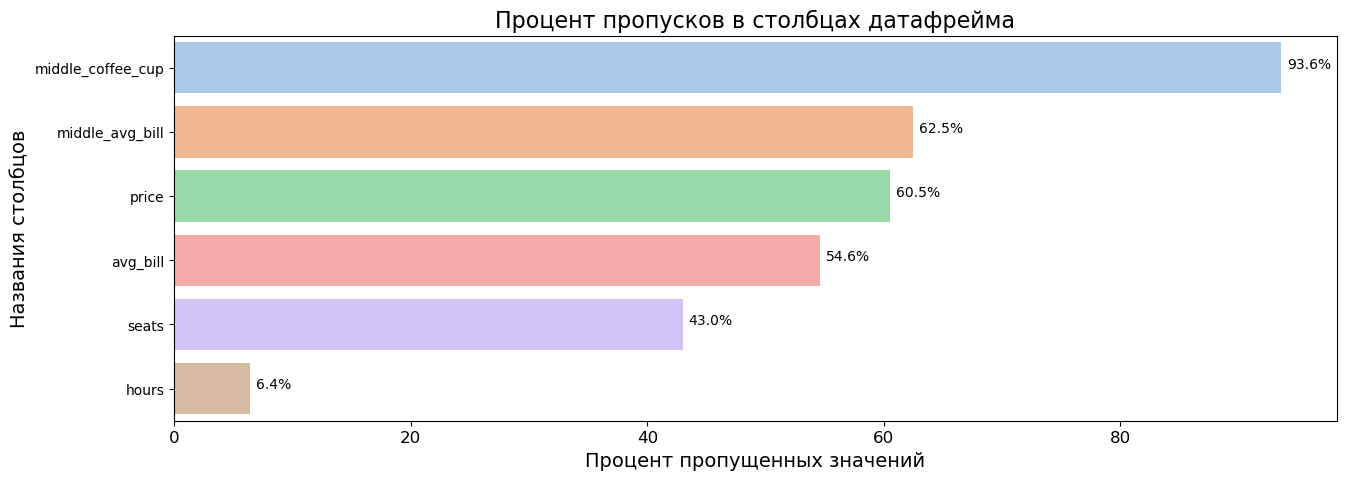

In [12]:
missing_data = round(df.isna().mean() * 100, 1)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=missing_data.values, y=missing_data.index, palette='pastel')
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Процент пропущенных значений', fontsize=14)
plt.ylabel('Названия столбцов', fontsize=14)
plt.title('Процент пропусков в столбцах датафрейма', fontsize=16)

for i, v in enumerate(missing_data.values):
    plt.text(v + 0.5, i, str(v) + '%', color='black', fontweight='normal')

Всего пропуски есть в 6 столбцах. Больше всего в middle_coffee_cup. Данные взяты из сервисов Яндекс Карты и Яндекс Бизнес. Похоже справочную информацию о среднем чеке, стоимости чашки капучино, количестве посадочных мест и режиме работы просто забыли добавить. Удаление пропусков приведет к потере большого объема данных. Можно попробовать поискать информацию в других источниках, но это займет очень много времени. Проще всего заменить пропуски на заглушку. В столбцах с типом object, вместо пропусков можно написать "Нет информации". А в столбцах int или float в качестве заглушки установить выбивающееся значение

In [13]:
df['hours'] = df['hours'].fillna('нет информации')
df['avg_bill'] = df['avg_bill'].fillna('нет информации')
df['price'] = df['price'].fillna('нет информации')

В столбцах с типом данных int и float сделаем это по необходимости. Пока же пусть останутся пропуски

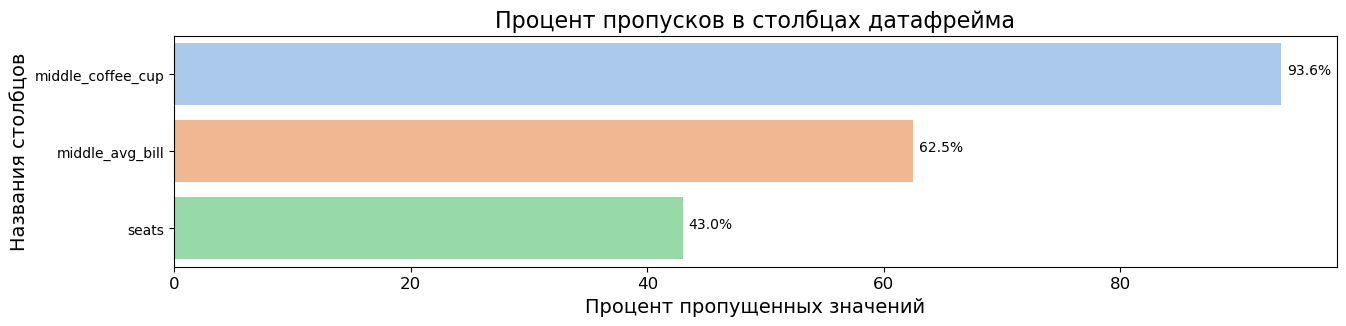

In [14]:
missing_data = round(df.isna().mean() * 100, 1)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(15, 3))
sns.barplot(x=missing_data.values, y=missing_data.index, palette='pastel')
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Процент пропущенных значений', fontsize=14)
plt.ylabel('Названия столбцов', fontsize=14)
plt.title('Процент пропусков в столбцах датафрейма', fontsize=16)

for i, v in enumerate(missing_data.values):
    plt.text(v + 0.5, i, str(v) + '%', color='black', fontweight='normal')

Пропуски остались в 3 столбцах: middle_coffee_cup, middle_avg_bill и seats

### Создание дополнительных столбцов

#### Столбец street

Создадим столбец street с названиями улиц из столбца address

In [15]:
# разделяем адреса на части по запятой
split_address = df['address'].str.split(', ')

# выбираем названия улицы (второй элемент после названия города) и добавляем столбец с названием улицы
df['street'] = split_address.str[1]

In [16]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,нет информации,нет информации,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,нет информации,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица


Столбец с названием улицы успешно добавлен

#### Столбец is_24/7

Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно

In [17]:
df['is_24/7'] = (df['hours'].str.lower().str.contains('круглосуточно')) & \
                (df['hours'].str.lower().str.contains('ежедневно'))

In [18]:
print(len(df[df['is_24/7'] == True]), 'заведений работают ежедневно и круглосуточно')

730 заведений работают ежедневно и круглосуточно


## Анализ данных

### Категории заведений

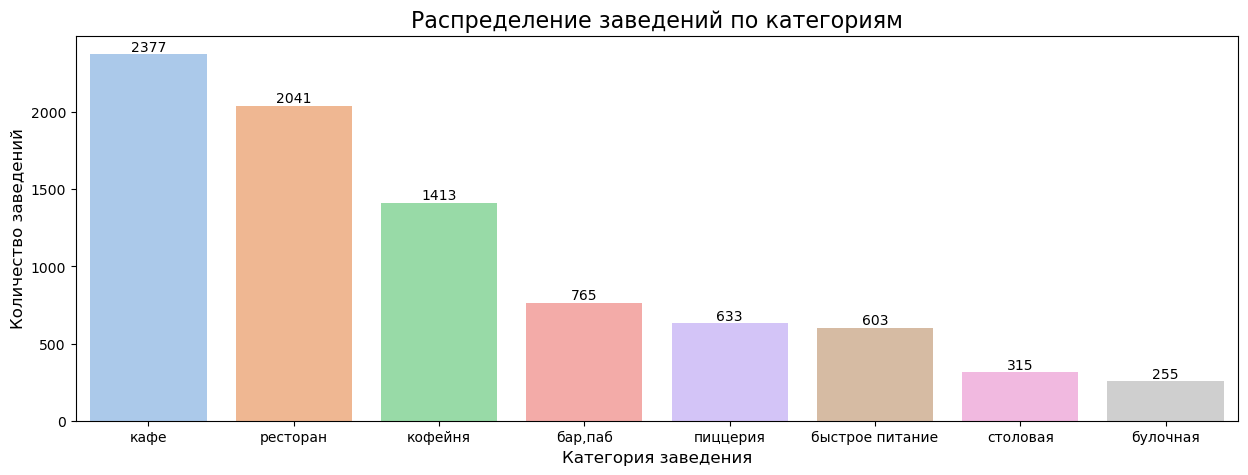

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='category', palette='pastel', order=df['category'].value_counts().index)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.title('Распределение заведений по категориям', fontsize=16)

# добавляем подписи к столбцам
for i, v in enumerate(df['category'].value_counts()):
    plt.text(i, v + 20, str(v), color='black', fontweight='normal', ha='center');

В датафрейме представлены заведения 8 категорий:
- кафе
- ресторан
- кофейня
- бар, паб
- пиццерия
- быстрое питание 
- столовая
- булочная

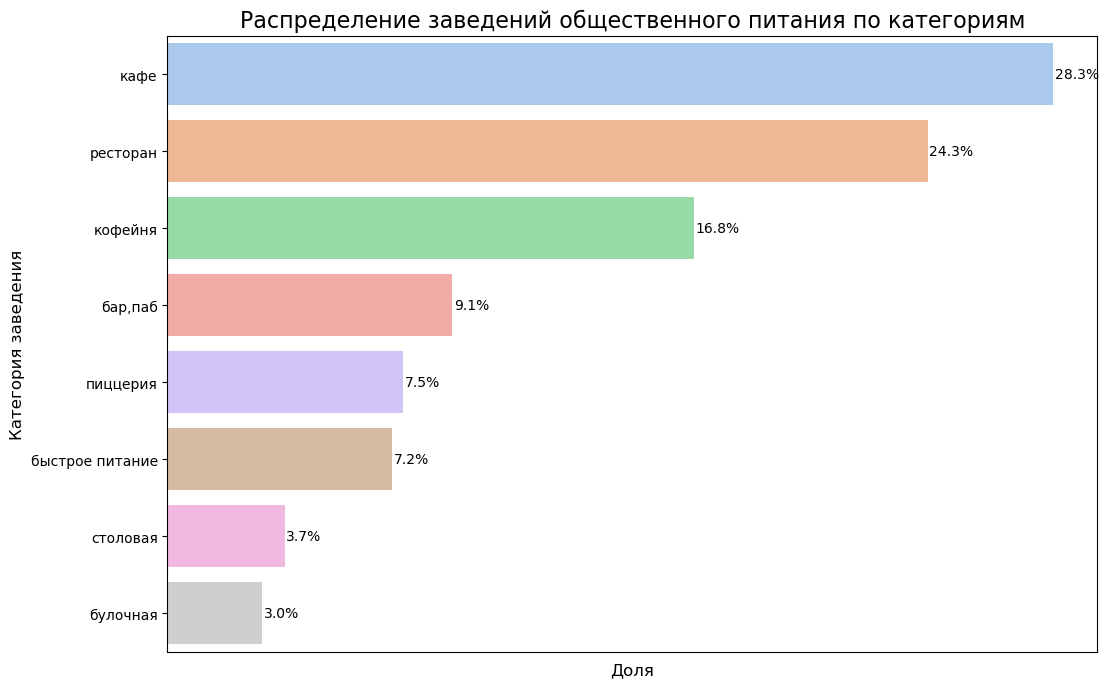

In [20]:
# вычисляем количество заведений в каждой категории
category_counts = df['category'].value_counts()

# создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel')

# добавляем заголовок и метки осей
plt.title('Распределение заведений общественного питания по категориям', fontsize=16)
plt.xlabel('Доля', fontsize=12)
plt.ylabel('Категория заведения', fontsize=12)

# убираем метки по оси X
plt.xticks([])

# добавляем проценты
for i, count in enumerate(category_counts.values):
    plt.text(count + 4, i, f'{count / len(df) * 100:.1f}%', ha='left', va='center')

# отображаем график
plt.show()

Большинство заведений относятся к категории кафе (28,3%), за ней следуют рестораны (24,3%), на третьем месте кофейни (16,8 %), бары и пабы на четвертом (9,1%)

### Количество посадочных мест

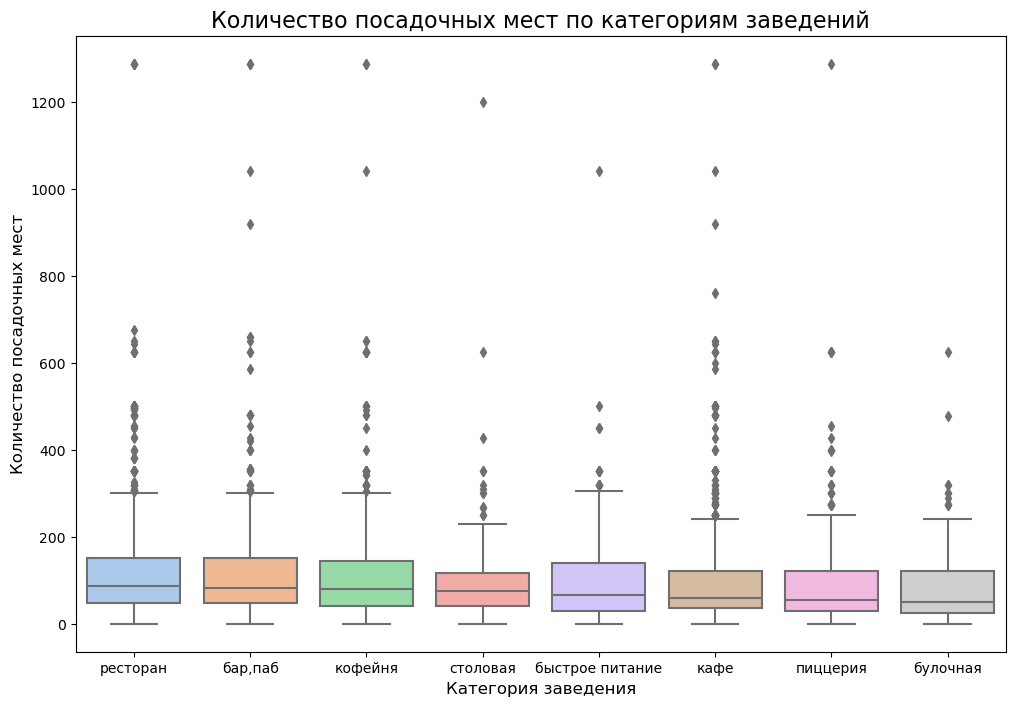

In [21]:
# вычисляем медианы для каждой категории
medians = df.groupby('category')['seats'].median()

# сортируем категории по медиане
order = medians.sort_values(ascending=False).index

# создаем график
sns.set_palette('pastel')
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='seats', data=df, order=order)
plt.title('Количество посадочных мест по категориям заведений', fontsize=16)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
plt.xticks(rotation=0);

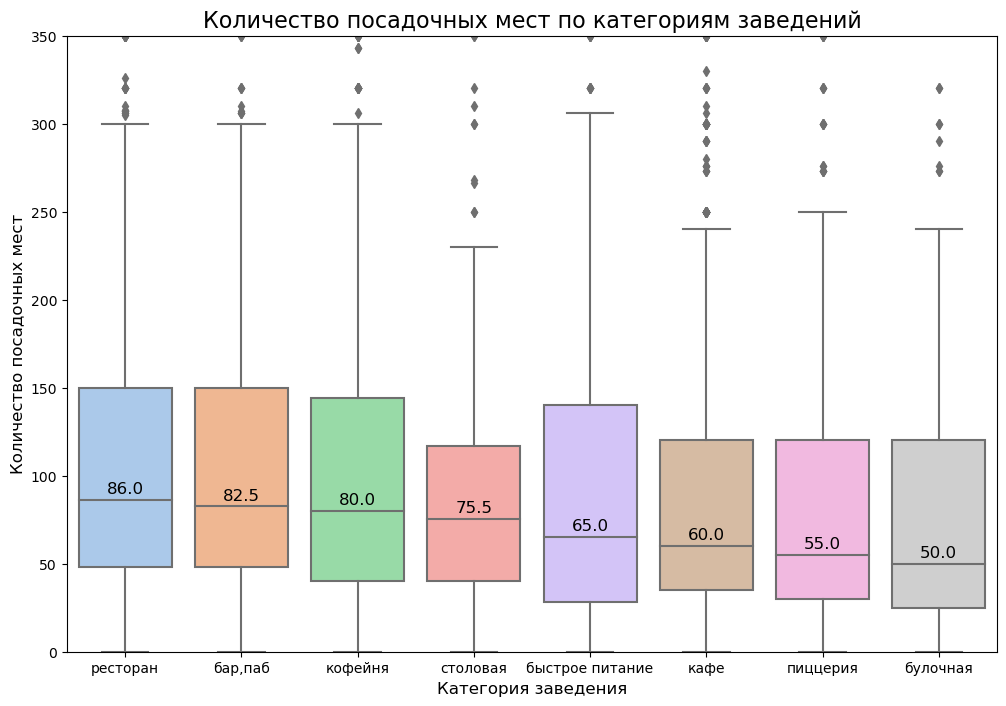

In [22]:
# строим график с измененным масштабом по оси y
sns.set_palette('pastel')
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='seats', data=df, order=order)
plt.title('Количество посадочных мест по категориям заведений', fontsize=16)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 350)

# считаем и выводим медианне значения
medians_number = medians.loc[order]
vertical_offset = df['seats'].median() * 0.05 # смещение текста относительно медианы
for i, v in enumerate(medians_number):
    plt.text(i, v + vertical_offset, str(v), horizontalalignment='center', 
             color='black', fontsize=12, fontweight='regular')

Во всех категориях есть выбросы. Если сравнивать медианные значения количества посадочных мест, то больше всего посадочных мест в ресторанах, барах/пабах и кофейнях. Меньше всего - в булочных

### Соотношение сетевых и несетевых заведений

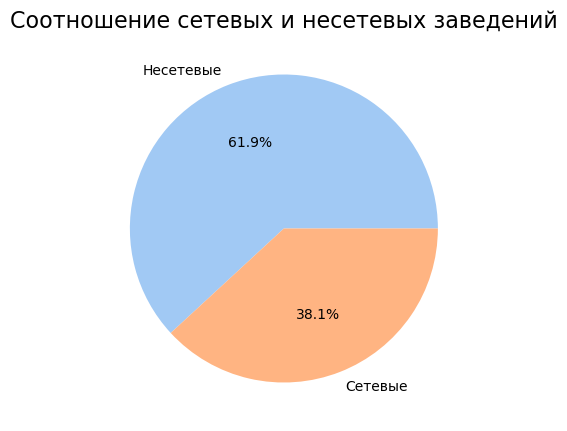

In [23]:
plt.figure(figsize=(5, 5))
sns.set_palette('pastel')
plt.pie(df['chain'].value_counts(), labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%')
plt.title('Соотношение сетевых и несетевых заведений', fontsize=16);

В датафрейме больше несетевых заведений. Соотношение несетевых и сетевых заведений - 61,9% на 38,1%

### Сетевые заведения по категориям

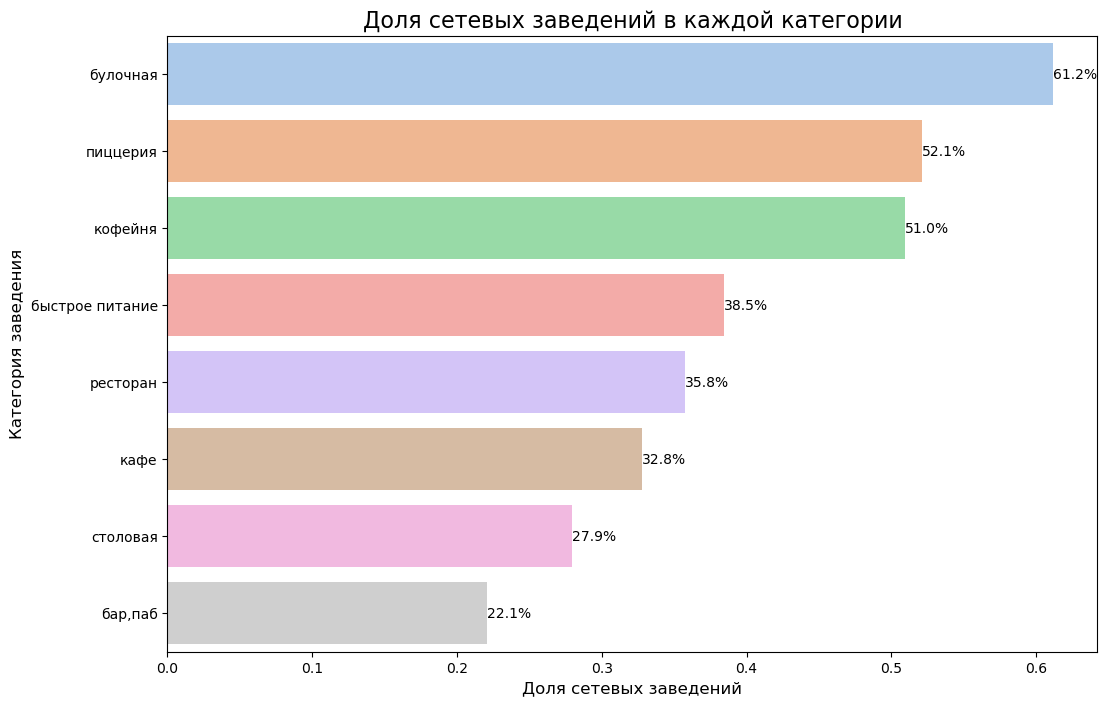

In [24]:
# считаем долю сетевых заведений по каждой категории
chain_rate = df.groupby('category')['chain'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=chain_rate, y='category', x='chain', 
            order=chain_rate.sort_values('chain', ascending=False)['category'])
plt.xlabel('Доля сетевых заведений', fontsize=12)
plt.ylabel('Категория заведения', fontsize=12)
plt.title('Доля сетевых заведений в каждой категории', fontsize=16)

for i, v in enumerate(chain_rate.sort_values('chain', ascending=False)['chain']):
    plt.annotate(str(round(v*100, 1))+'%', xy=(v, i), ha='left', va='center')

Процент сетевых заведений больше всего у булочных, меньше всего у баров/пабов

### Топ-15 популярных заведений в Москве

In [25]:
chain_count = (
    df.groupby(['name', 'category'])['chain']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'chain': 'count'})
)

In [26]:
top_chains = chain_count.head(15)
top_chains

,name,category,count
0,шоколадница,кофейня,119
1,домино'с пицца,пиццерия,76
2,додо пицца,пиццерия,74
3,one price coffee,кофейня,71
4,яндекс лавка,ресторан,69
5,cofix,кофейня,65
6,prime,ресторан,49
7,кофепорт,кофейня,42
8,кулинарная лавка братьев караваевых,кафе,39
9,теремок,ресторан,36


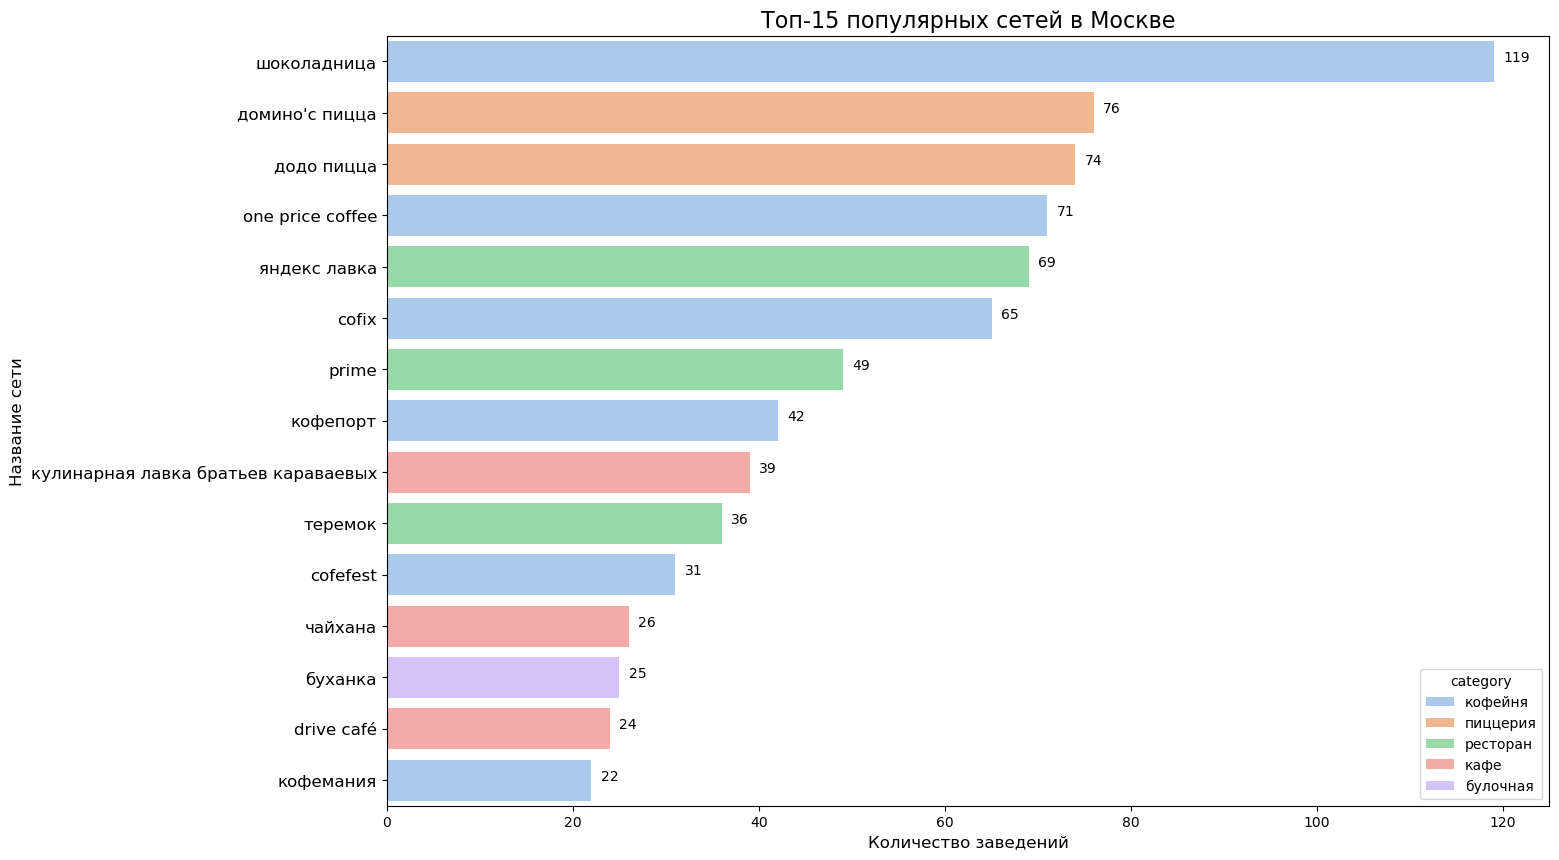

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(data=top_chains, x='count', y='name', hue='category', palette='pastel', dodge=False)
plt.xticks(rotation=0, ha='center')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название сети', fontsize=12)
plt.title('Топ-15 популярных сетей в Москве', fontsize=16)
plt.tick_params(axis='y', labelsize=12)

for i, v in enumerate(top_chains['count']):
    plt.text(v + 1, i, str(v), color='black', fontweight='normal')

Больше всего заведений у Шоколадницы, на втором месте - Домино'с Пицца, а Додо Пицца - на третьем. Меньше всего заведений у Му-Му. Заведения относятся к разным категориям: Шоколадница - это кофейня, Додо Пицца - пиццерия, а Яндекс Лавка - ресторан

### Заведения по административным районам

#### Общее количество заведений по районам

In [28]:
district_counts = df['district'].value_counts()

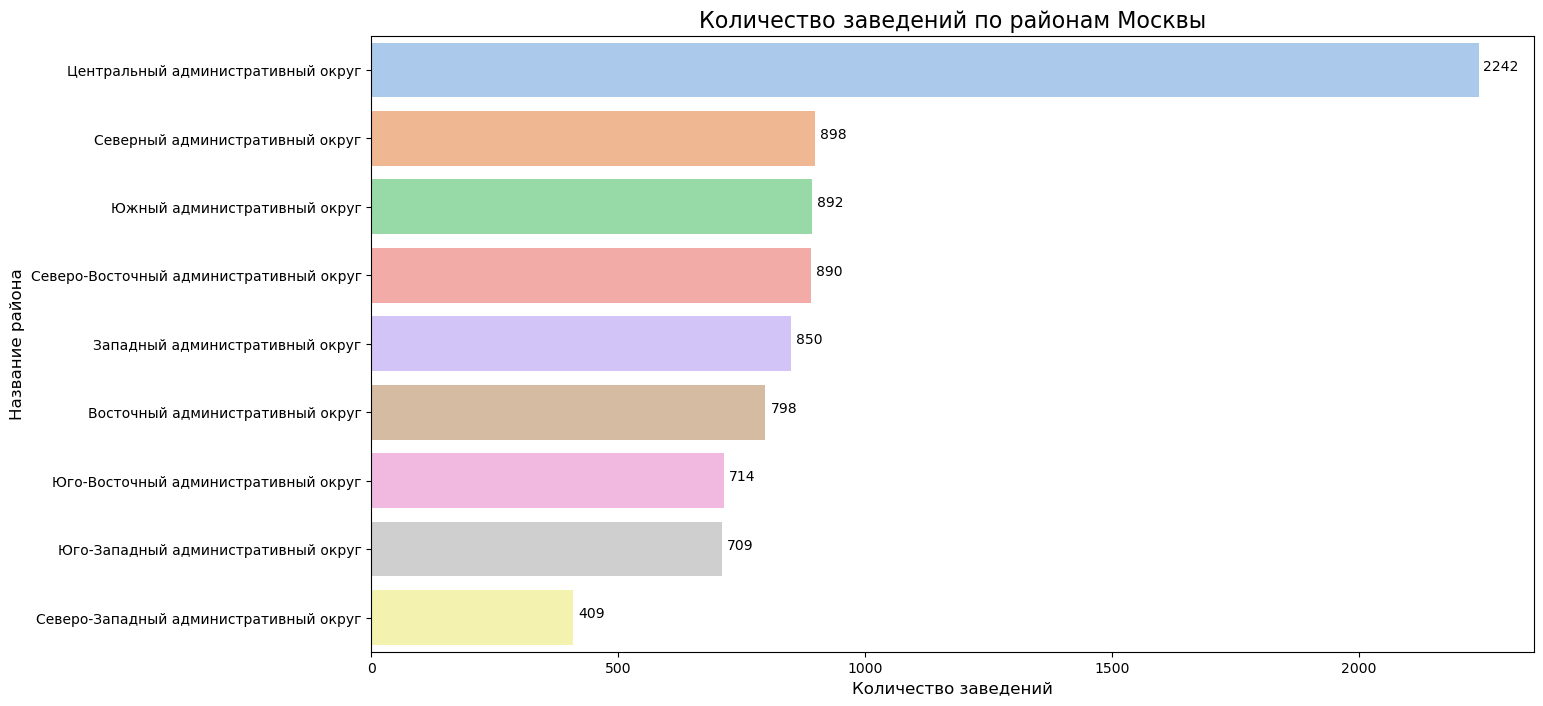

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='pastel')
plt.title('Количество заведений по районам Москвы', fontsize=16)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название района', fontsize=12)
plt.xticks(rotation=0, ha='center')

# добавляем числовые значения на график
for i, v in enumerate(district_counts.values):
    plt.text(v + 10, i, str(v), color='black', fontweight='normal');

Больше всего заведений в Центральном административном округе Москвы, меньше всего в Северо-Западном административном округе

#### Количество заведений по категориям

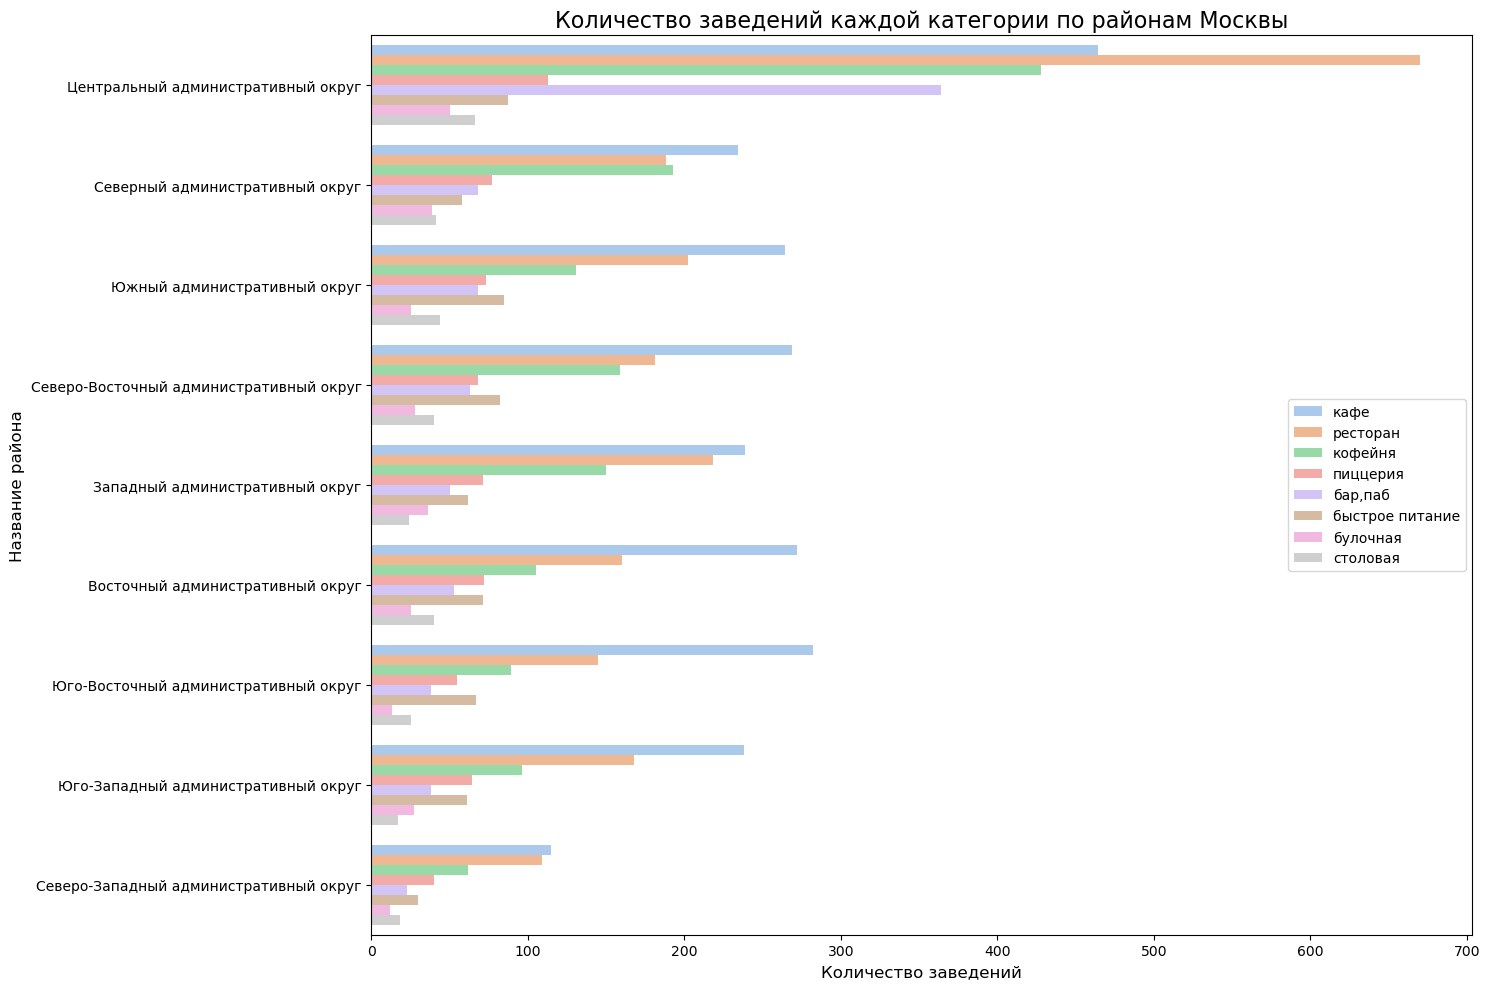

In [30]:
plt.figure(figsize=(15, 10))
sns.countplot(y='district', hue='category', data=df, order=df['district'].value_counts().index)
plt.ylabel('Название района', fontsize=12)
plt.xlabel('Количество заведений', fontsize=12)
plt.title('Количество заведений каждой категории по районам Москвы', fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout();

В Центральном административном округе Москвы больше всего ресторанов. На втором месте кафе, на третьем - кофейни  

В Северном административном округе на первом месте кафе, на втором кофейни, на третьем - рестораны  

Для остальных райнов топ-3 по количество заведений выглядит следующим образом:
- кафе
- рестораны
- кофейни

### Средние рейтинги по категориям

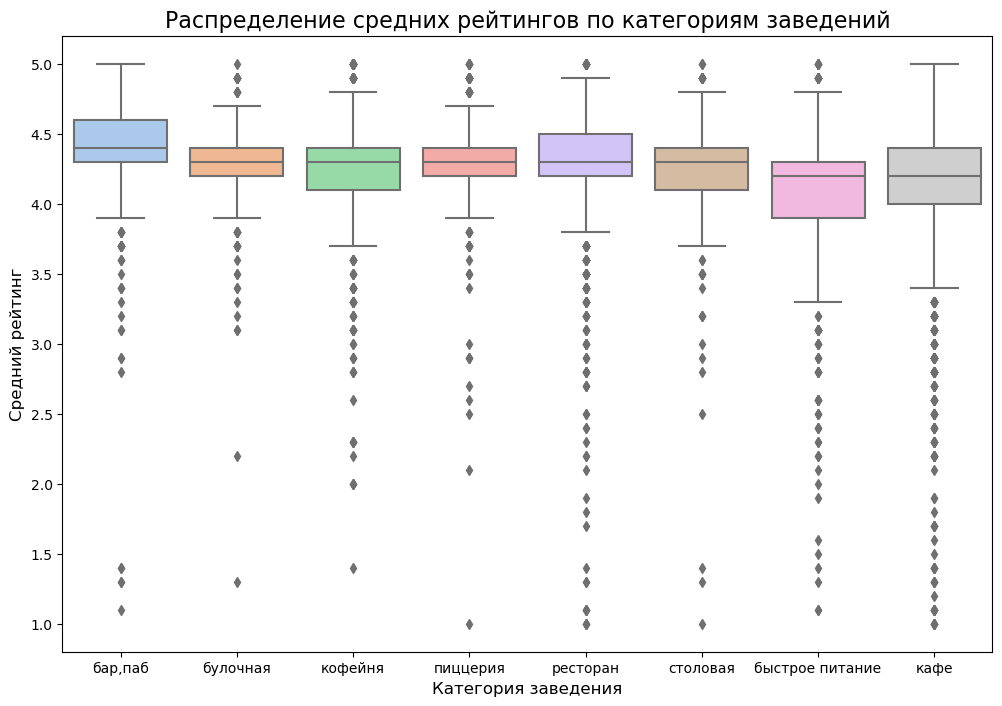

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='rating', data=df, 
            order=df.groupby('category')['rating'].median().sort_values(ascending=False).index)
plt.title('Распределение средних рейтингов по категориям заведений', fontsize=16)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12);

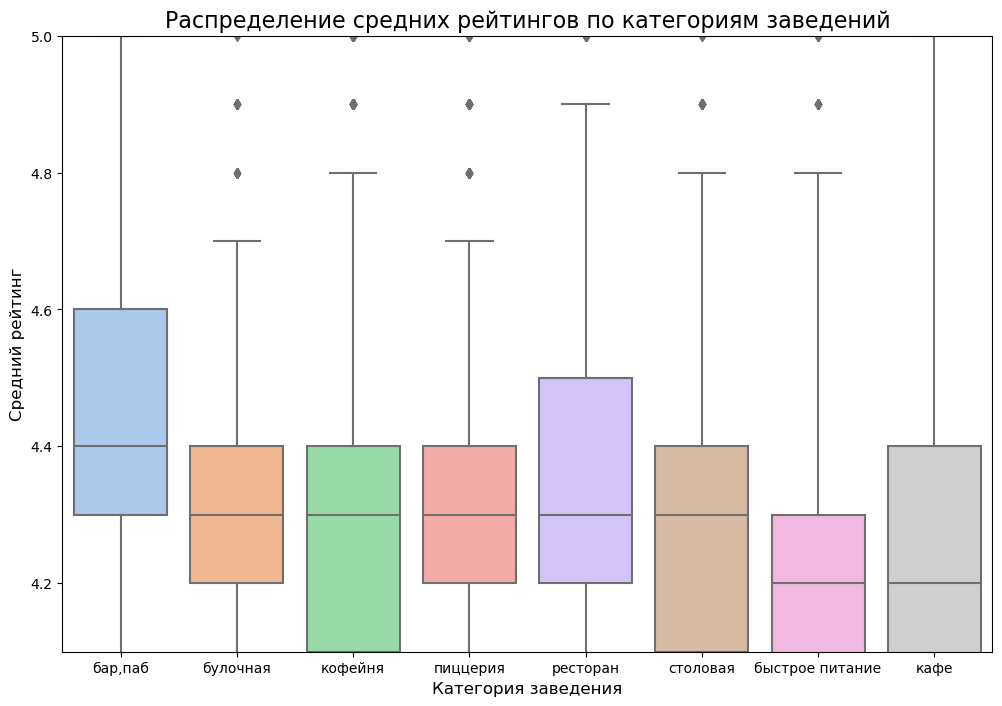

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='rating', data=df, 
            order=df.groupby('category')['rating'].median().sort_values(ascending=False).index)
plt.title('Распределение средних рейтингов по категориям заведений', fontsize=16)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.ylim(4.1, 5);

Медианные значения рейтингов для всех категорий заведений находятся в интервале от 4,2 до 4,4. В каждой категории есть заведения с низким рейтингом, но по отношению к общему количеству заведений в категории их немного. Это выбросы. Самый высокий медианный рейтинг 4,4 у баров/пабов. Самый низкий 4,2 - у заведений с категорией быстрое питание и кафе. Для категорий булочная, кофейня, пиццерия, ресторан, столовая, быстрое питание рейтинг близкий к 5 скорее исключение

### Средний рейтинг заведений каждого района Москвы

In [33]:
# считаем средний рейтинг заведений в каждом районе
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean')

rating_df['rating'] = rating_df['rating'].round(2)

# переименовываем столбцы
rating_df = rating_df.rename(columns={
    'district': 'Округ',  #
    'rating': 'Рейтинг'
})

# сортируем по рейтингу и выводим
rating_df.sort_values(by='Рейтинг', ascending=False)

,Округ,Рейтинг
5,Центральный административный округ,4.38
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
1,Западный административный округ,4.18
8,Южный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


Самый высокий средний рейтинг заведений 4,38 в Центральном административном округе Москвы. Самый низкий 4,1 в Юго-Восточном

### Топ-15 улиц по количеству заведений

#### Общее количество заведений на топ-15 улицах Москвы

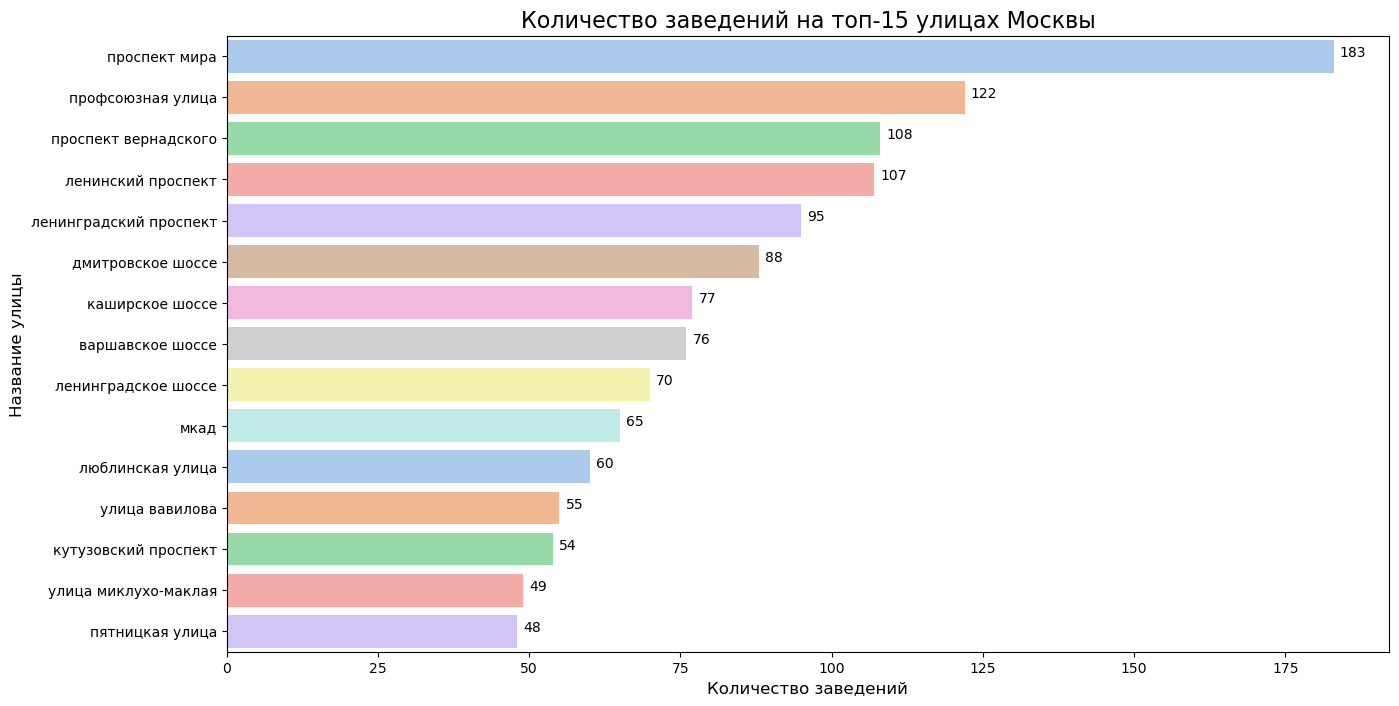

In [34]:
street_counts = df['street'].value_counts().head(15)

plt.figure(figsize=(15, 8))
sns.barplot(x=street_counts.values, y=street_counts.index, palette='pastel')
plt.title('Количество заведений на топ-15 улицах Москвы', fontsize=16)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название улицы', fontsize=12)
plt.xticks(rotation=0, ha='center')

# добавляем числовые значения на график
for i, v in enumerate(street_counts.values):
    plt.text(v + 1, i, str(v), color='black', fontweight='normal');

Больше всего заведений в Москве на улице проспект Мира

#### Количество заведений каждой категории на топ-15 улицах Москвы

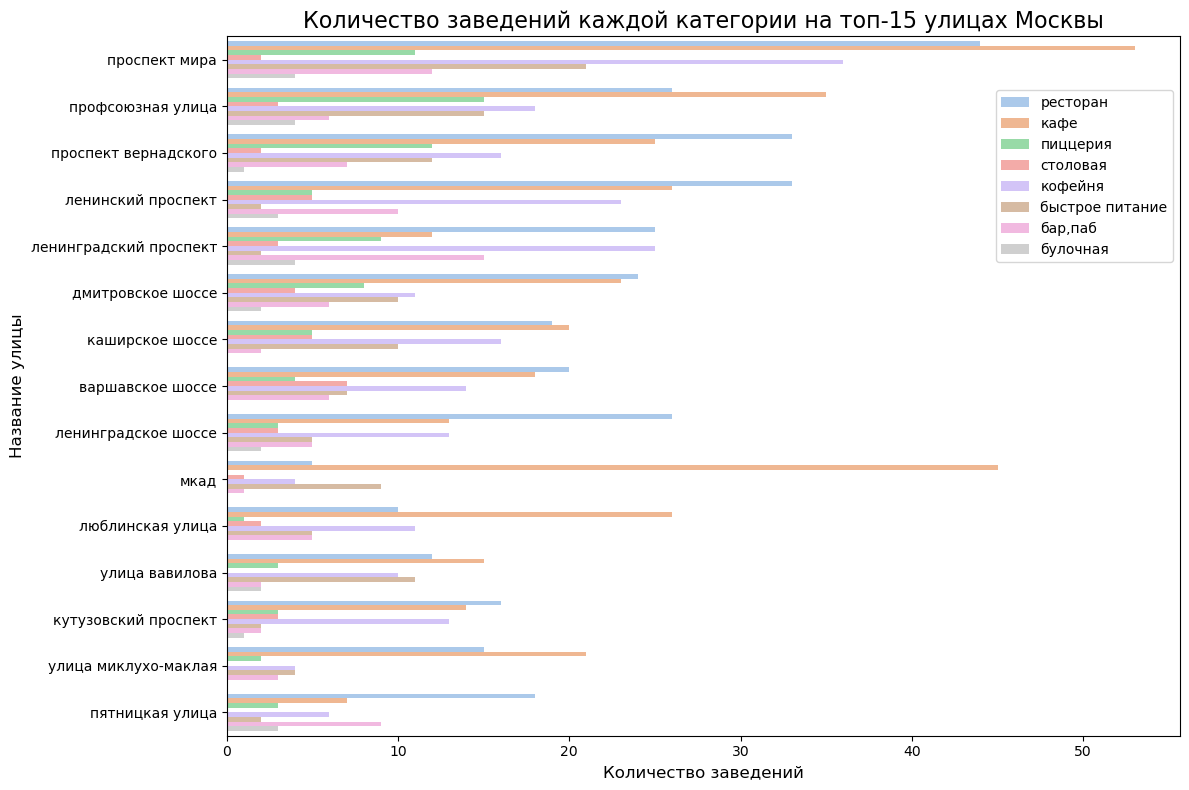

In [35]:
# получаем список топ-15 улиц по количеству заведений
top_15_streets = street_counts.index.tolist()

# фильтруем датафрейм по улицам из топ-15
df_top_streets = df[df['street'].isin(top_15_streets)]

# строим график
plt.figure(figsize=(12, 8))
sns.countplot(y='street', hue='category', data=df_top_streets, order=top_15_streets)
plt.ylabel('Название улицы', fontsize=12)
plt.xlabel('Количество заведений', fontsize=12)
plt.title('Количество заведений каждой категории на топ-15 улицах Москвы', fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.8))
plt.tight_layout();

#### Количество заведений каждой категории на топ-5 улицах Москвы

Выберем топ-5 улиц по количеству заведений и сделаем выводы

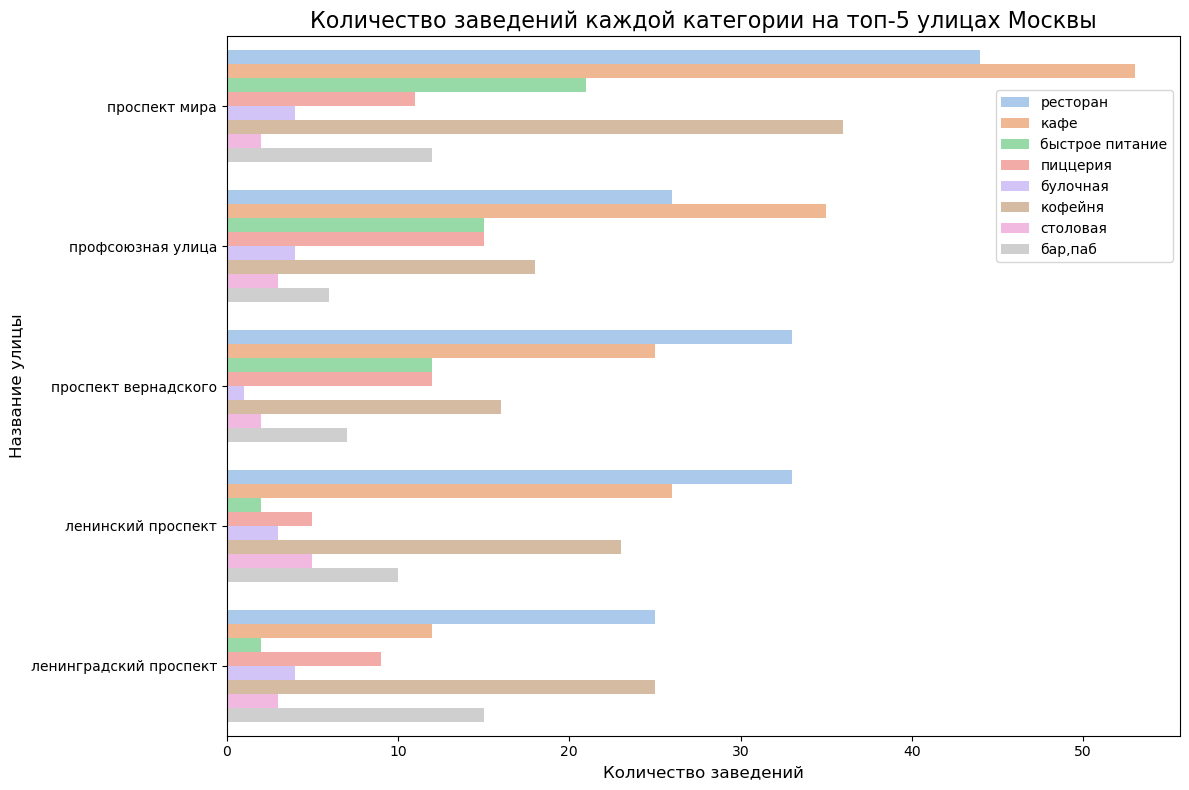

In [36]:
# получаем список топ-5 улиц по количеству заведений
top_5_streets = street_counts.head(5).index.tolist()

# фильтруем датафрейм по улицам из топ-5
df_top_streets = df[df['street'].isin(top_5_streets)]

# строим график
plt.figure(figsize=(12, 8))
sns.countplot(y='street', hue='category', data=df_top_streets, order=top_5_streets)
plt.ylabel('Название улицы', fontsize=12)
plt.xlabel('Количество заведений', fontsize=12)
plt.title('Количество заведений каждой категории на топ-5 улицах Москвы', fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.8))
plt.tight_layout();

Самые распространенные заведения для топ-5 улиц в Москве - это рестораны, кафе и кофейни. На Ленинградском проспекте в топ-3 заведений место кафе занимает категория бар/паб

### Улицы с одним объектом общепита

#### Общее количество

In [37]:
# считаем количество заведений на каждой улице
street_counts = df['street'].value_counts()

# находим улицы, на которых только одно заведение
one_place_streets = street_counts[street_counts == 1].index.tolist()

In [38]:
print('Количество улиц в Москве с одним объектом общепита -', len(one_place_streets))

Количество улиц в Москве с одним объектом общепита - 457


In [39]:
# фильтруем исходный датафрейм по найденным улицам
df_one_place_streets = df[df['street'].isin(one_place_streets)]

#### Категории заведений на улицах с одним заведением

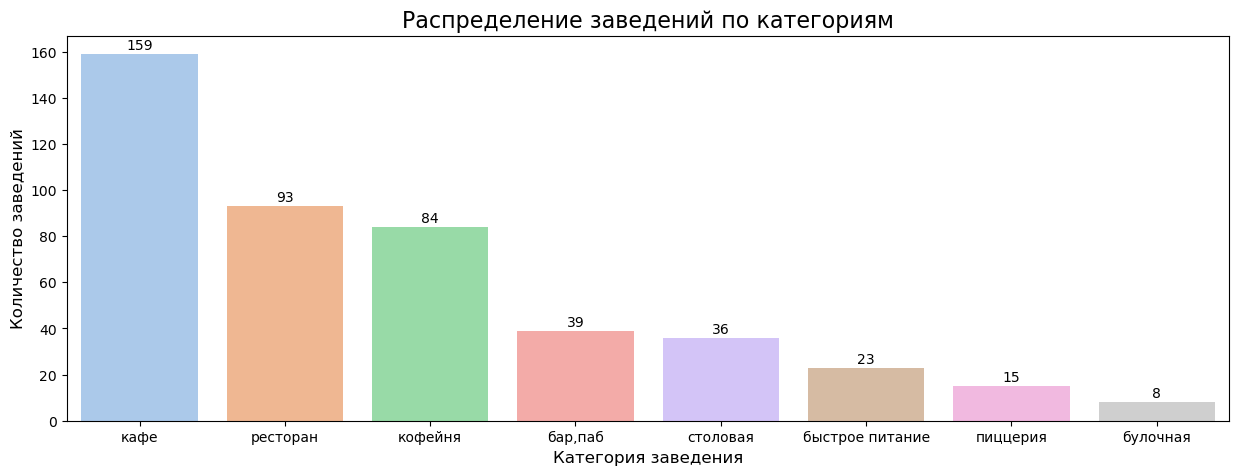

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_one_place_streets, x='category', palette='pastel', 
              order=df_one_place_streets['category'].value_counts().index)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.title('Распределение заведений по категориям', fontsize=16)

# Добавляем подписи к столбцам
for i, v in enumerate(df_one_place_streets['category'].value_counts()):
    plt.text(i, v + 2, str(v), color='black', fontweight='normal', ha='center');

Чаще всего на улицах с одним заведением общественного питания расположены кафе, рестораны или кофейни. Ситуация точно такая же как и для всего набора данных. Скорее всего нет никакой взаимосвязи, просто заведения расположены на небольших улицах или переулках

### Средний чек заведений каждого района Москвы

In [41]:
# считаем средний рейтинг заведений в каждом районе
check_by_district = df.groupby('district', as_index=False)['middle_avg_bill'].agg('median')

# переименовываем столбцы
check_by_district = check_by_district.rename(columns={
    'district': 'Округ',
    'middle_avg_bill': 'Средний чек'
})

# сортируем по рейтингу и выводим 
check_by_district.sort_values(by='Средний чек', ascending=False)

,Округ,Средний чек
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


Самый высокий средний чек в Западном и Центральном административных округах Москвы. Самый низкий в Юго-Восточном. Чем дальше от центра, тем средний чек в заведении ниже

### Заведения с самыми низкими рейтингами

Посмотрим, какие категории заведений чаще всего имеют рейтинг ниже 3

#### Количество в каждой категории

In [42]:
low_rating = df[df['rating'] < 3]

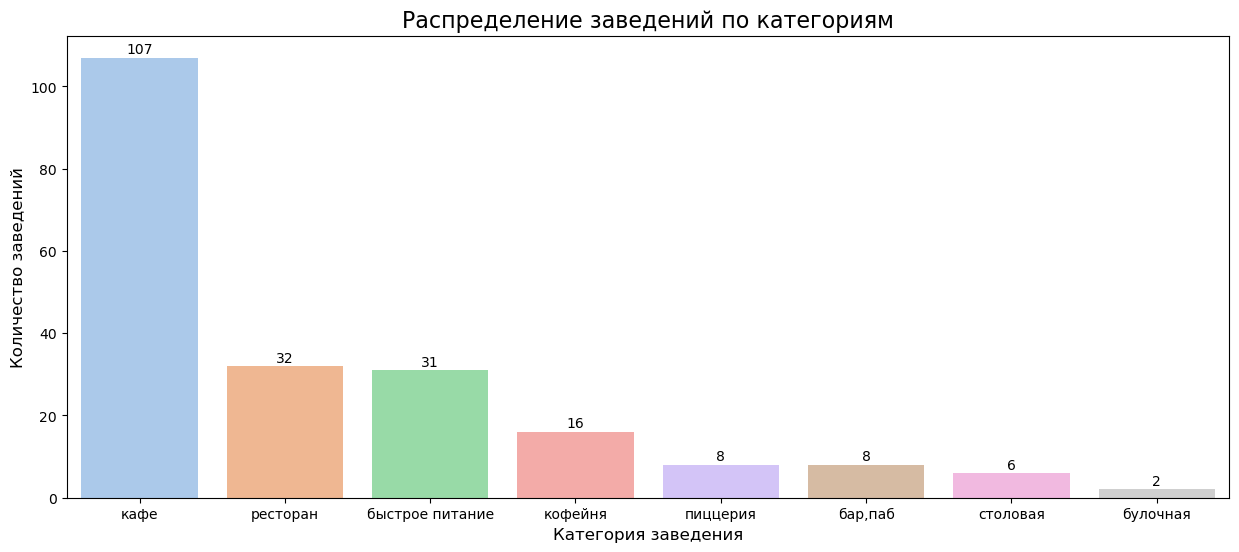

In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(data=low_rating, x='category', palette='pastel', 
              order=low_rating['category'].value_counts().index)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.title('Распределение заведений по категориям', fontsize=16)

# Добавляем подписи к столбцам
for i, v in enumerate(low_rating['category'].value_counts()):
    plt.text(i, v + 1, str(v), color='black', fontweight='normal', ha='center');

Кафе чаще всего имеют рейтинг меньше 3. Меньше всего заведений с плохим рейтингом у булочных

#### Распределение по районам Москвы

In [44]:
lr_district_counts = low_rating['district'].value_counts()

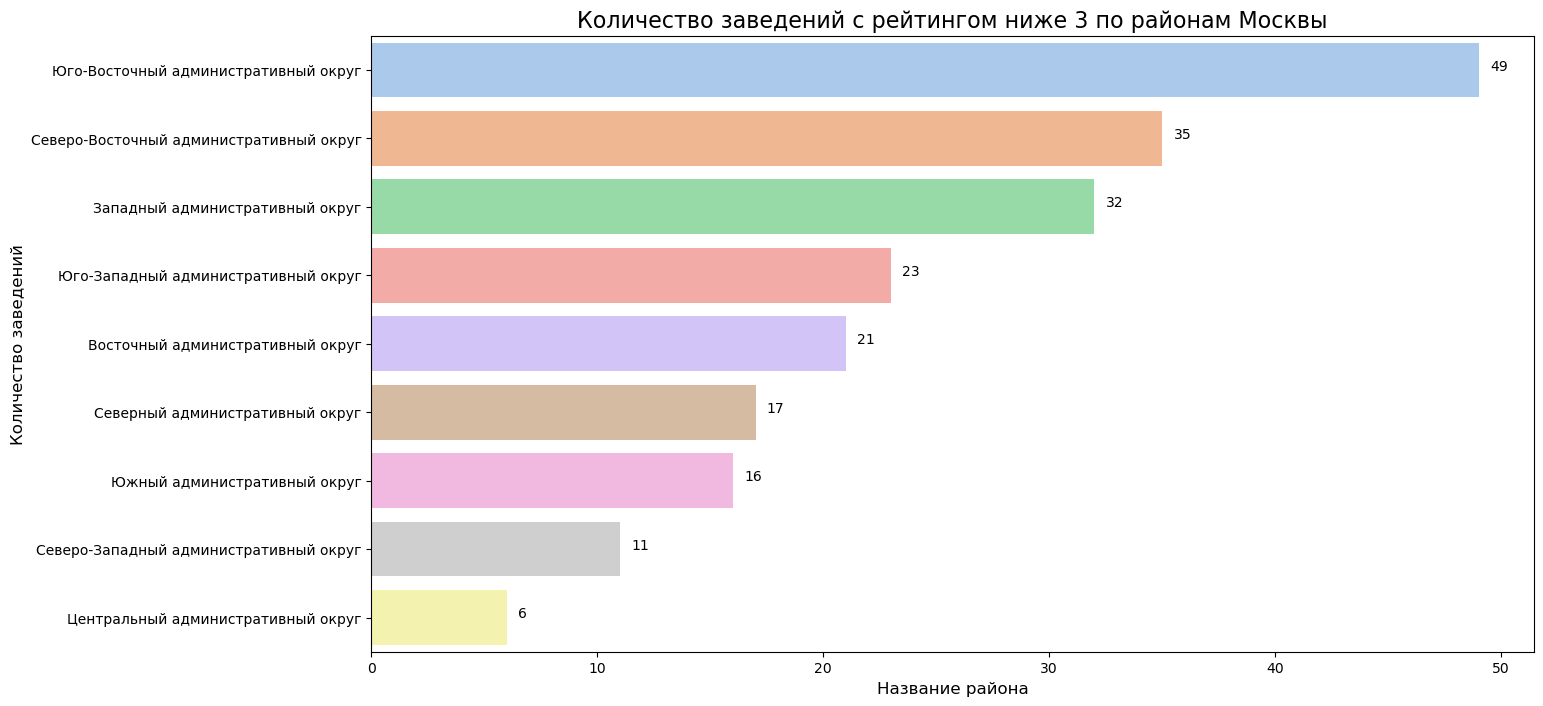

In [45]:
plt.figure(figsize=(15, 8))
sns.barplot(x=lr_district_counts.values, y=lr_district_counts.index, palette='pastel')
plt.title('Количество заведений с рейтингом ниже 3 по районам Москвы', fontsize=16)
plt.xlabel('Название района', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Добавление числовых значений на график
for i, v in enumerate(lr_district_counts.values):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='normal');

Больше всего заведений с рейтингом меньше 3 в Юго-Восточном, Северо-Восточном и Западном административных округах Москвы. Меньше всего заведений с низким рейтингом в Центральном округе

### Промежуточные выводы

- В датафрейме представлены заведения 8 категорий: кафе, ресторан, бар/паб, пиццерия, быстрое питание, столовая, булочная

- Большинство заведений относятся к категории кафе (28,3%), за ней следуют рестораны (24,3%), на третьем месте кофейни (16.8 %), бары и пабы на четвертом (9,1%)

- Если сравнивать медианные значения количества посадочных мест, то больше всего посадочных мест в ресторанах, барах/пабах и кофейнях. Меньше всего - в булочных

- В датафрейме больше несетевых заведений. Соотношение несетевых и сетевых заведений - 61,9% на 38,1%

- Процент сетевых заведений больше всего у булочных, меньше всего у баров/пабов

- Больше всего заведений у Шоколадницы, на втором месте - Домино'с Пицца, а Додо Пицца - на третьем. Меньше всего заведений у Му-Му. Все они относятся к разным категориям. Например, Шоколадница - это кофейня, Додо Пицца - пиццерия, а Яндекс Лавка - ресторан

- Больше всего заведений в Центральном административном округе Москвы, меньше всего в Северо-Западном административном округе

- В Центральном административном округе Москвы больше всего ресторанов. На втором месте кафе, на третьем - кофейни

- В Северном административном округе на первом месте кафе, на втором кофейни, на третьем - рестораны

- Для остальных райнов топ-3 по количество заведений выглядит следующим образом: кафе, рестораны, кофейни

- Медианные значения рейтингов для всех категорий заведений находятся в интервале от 4,2 до 4,4. В каждой категории есть заведения с низким рейтингом, но по отношению к общему количеству заведений в категории их немного. Это выбросы. Самый высокий медианный рейтинг 4,4 у баров/пабов. Самый низкий 4,2 - у заведений с категорией быстрое питание и кафе. Для категорий булочная, кофейня, пиццерия, ресторан, столовая, быстрое питание рейтинг близкий к 5 скорее исключение

- Самый высокий средний рейтинг заведений 4,38 в Центральном административном округе Москвы. Самый низкий 4,1 в Юго-Восточном

- Больше всего заведений в Москве на улице проспект Мира

- Самые распространенные заведения для топ-5 улиц в Москве - это рестораны, кафе и кофейни. На Ленинградском проспекте в топ-3 заведений место кафе занимает категория бар/паб

- Чаще всего на улицах с одним заведением общественного питания расположены кафе, рестораны или кофейни. Ситуация точно такая же как и для всего набора данных. Скорее всего нет никакой взаимосвязи, просто заведения расположены на небольших улицах или переулках

- Самый высокий средний чек в Западном и Центральном административных округах Москвы. Самый низкий в Юго-Восточном. Чем дальше от центра, тем средний чек в заведении ниже

- Кафе чаще всего имеют рейтинг меньше 3. Меньше всего заведений с плохим рейтингом у булочных

- Больше всего заведений с рейтингом меньше 3 в Юго-Восточном, Северо-Восточном и Западном административных округах Москвы. Меньше всего заведений с низким рейтингом в Центральном округе

## Детализация исследования открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуем определить, осуществима ли мечта клиентов

### Общее количество кофеен в городе

In [46]:
coffee_house = df[df['category'] == 'кофейня']

In [47]:
print('Общее количество кофеен в Москве -', len(coffee_house))

Общее количество кофеен в Москве - 1413


### Количество кофеен по районам Москвы

In [48]:
#считаем количество кофеен в каждом районе Москвы
count_ch = (
    coffee_house.groupby('district', as_index=False)['name'].agg('count').
    rename(columns={'name': 'count'}).
    sort_values(by='count', ascending=False)
)

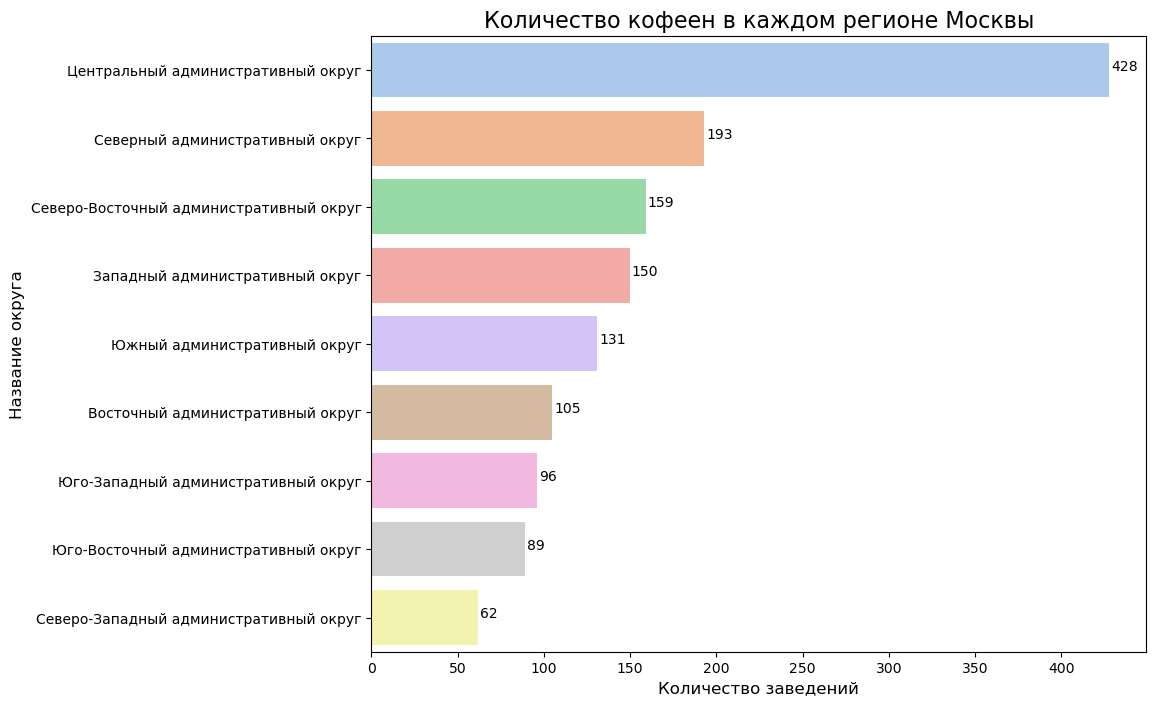

In [49]:
plt.figure(figsize=(10, 8))
sns.barplot(data=count_ch, y='district', x='count', palette='pastel')
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название округа', fontsize=12)
plt.title('Количество кофеен в каждом регионе Москвы', fontsize=16)

for i, v in enumerate(count_ch['count']):
    plt.text(v + 1, i, str(v), color='black', fontweight='normal')

Больше всего кофеен в Центральном административном округе Москвы, на втором месте по количеству кофеен Северный административный округ, Северо-Восточный административный округ - на третьем. Меньше всего кофеен в Северо-Западном административном округе 

### Круглосуточные кофейни

In [50]:
coffee_house_24h = coffee_house[coffee_house['is_24/7'] == True]

In [51]:
print('Количество круглосуточных кофеен в Москве -', len(coffee_house_24h))

Количество круглосуточных кофеен в Москве - 59


### Рейтинги кофеен по районам

In [52]:
#считаем средний рейтинг кофеен в каждом районе
rating_ch = coffee_house.groupby('district', as_index=False)['rating'].agg('mean')
rating_ch['rating'] = rating_ch['rating'].round(2)
rating_ch.sort_values(by='rating', ascending=False)

,district,rating
5,Центральный административный округ,4.34
4,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
0,Восточный административный округ,4.28
7,Юго-Западный административный округ,4.28
6,Юго-Восточный административный округ,4.23
8,Южный административный округ,4.23
3,Северо-Восточный административный округ,4.22
1,Западный административный округ,4.20


Самый высокий средний рейтинг у кофеен 4,34 в Центральном административном округе Москвы, на втором месте Северо-Западный округ - 4,33, на третьем Северный - 4,29. Ниже всего рейтинг у кофеен в Западном административном округе - 4,2

### Стоимость чашки капучино

In [53]:
#считаем среднюю стоимость чашки капучино в кофейнях в каждом районе
middle_coffee_cup = (
    coffee_house.groupby('district', as_index=False)['middle_coffee_cup'].agg('median').
    sort_values(by='middle_coffee_cup', ascending=False)
)

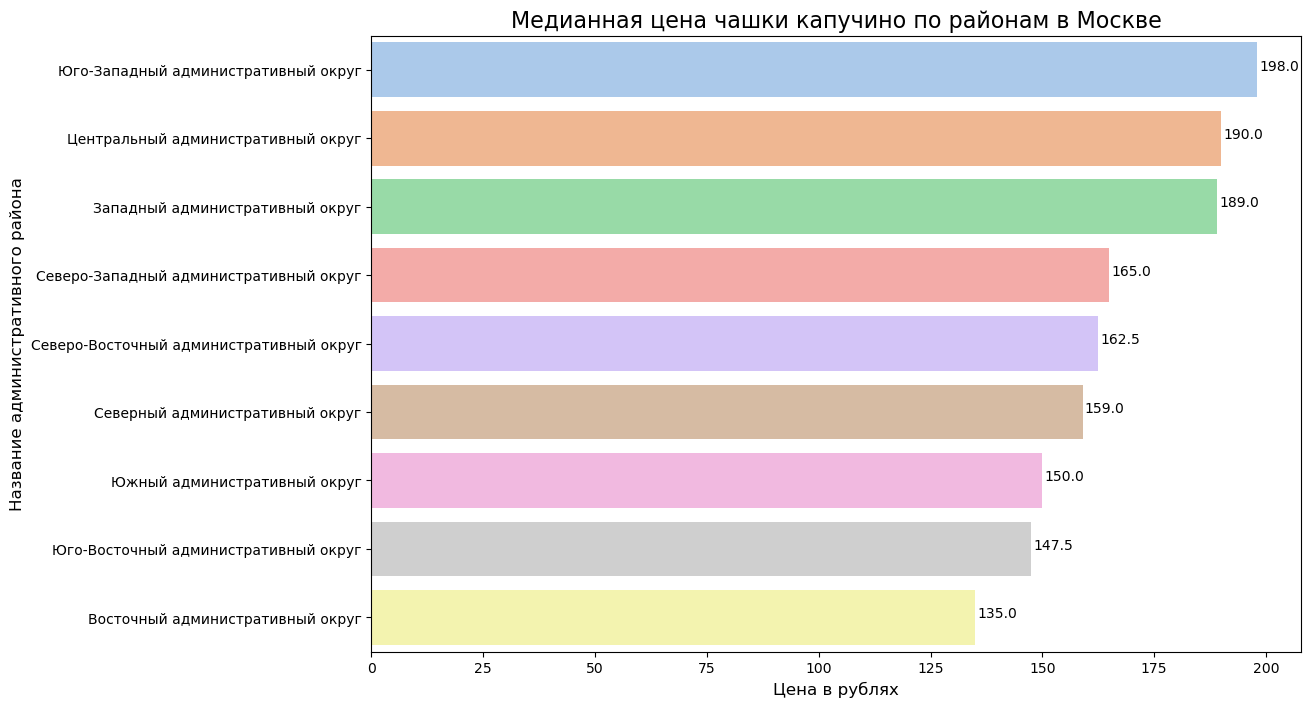

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(data=middle_coffee_cup, y='district', x='middle_coffee_cup')
plt.xlabel('Цена в рублях', fontsize=12)
plt.ylabel('Название административного района', fontsize=12)
plt.title('Медианная цена чашки капучино по районам в Москве', fontsize=16)

for i, v in enumerate(middle_coffee_cup['middle_coffee_cup']):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='normal')

Выше всего медианная стоимость чашки кофе в кофейнях Юго-Западного, Центрального и Западного административных округов Москвы. Дешевле всего чашка кофе обойдется в Восточном административном округе

При открытии кофейни стоимость чашки капучино должна быть установлена так, чтобы покрыть все расходы на производство и продажу напитков и обеспечить прибыль. Ориентироваться на конкретную стоимость сложно, так как она зависит от многих факторов, таких как рыночные условия, конкуренция, расходы на аренду и оборудование, зарплаты сотрудников и т.д.

Важно помнить, что установление слишком высокой цены может отпугнуть потенциальных клиентов, а слишком низкая цена может привести к убыткам или недостаточной прибыли. Поэтому при установлении цен на продукцию нужно учитывать все затраты и рыночные условия, а также стремиться к балансу между ценой и качеством продукции

### Промежуточные выводы

- Общее количество кофеен в Москве - 1413. Эта категория заведений общественного питания идет на третьем месте после кафе и ресторанов

- Больше всего кофеен в Центральном административном округе Москвы, на втором месте по количеству кофеен Северный административный округ,  на третьем - Северо-Восточный административный округ. Меньше всего кофеен в Северо-Западном административном округе

- В Москве 59 круглосуточных кофеен

- Самый высокий средний рейтинг у кофеен 4,34 в Центральном административном округе Москвы, на втором месте Северо-Западный округ - 4,33, на третьем Северный - 4,29. Ниже всего рейтинг у кофеен в Западном административном округе - 4,2

- Выше всего медианная стоимость чашки кофе в кофейнях Юго-Западного, Центрального и Западного административных округов Москвы. Дешевле всего чашка кофе обойдется в Восточном административном округе

### Рекомендации по открытию кофейни

Общее количество кофеен в Москве достаточно велико - 1413. Эта категория заведений общественного питания идет на третьем месте после кафе и ресторанов. Поэтому нужно быть готовым к высокой конкуренции. Предлагать качественный продукт, который будет выделяться на фоне конкурентов, и хороший уровень сервиса

Больше всего кофеен расположено в Центральном административном округе и Северном административном округе, причем отставание первого от второго почти в 2 раза по количеству заведений. В Центре Москвы большой поток людей, но проблема может быть в стоимости аренды и высокой конкуренции. Лучше обратить внимание на другие районы, например Юго-Западный. Там всего 96 кофеен. При этом средняя стоимость чашки капучино самая высокая

В Москве очень мало круглосуточных кофеен. Возможно, стоит подробнее изучить этот вопрос и подумать в эту сторону

Открывать кофейню нужно в одном из районов с высокой плотностью населения, но с более низкой конкуренцией со стороны других кофеен. Также стоит учитывать стоимость аренды. Чтобы это выяснить, необходимо собрать информацию и провести дополнительный анализ

## Выводы

- В датафрейме представлены заведения 8 категорий: кафе, ресторан, бар/паб, пиццерия, быстрое питание, столовая, булочная

- Большинство заведений относятся к категории кафе (28,3%), за ней следуют рестораны (24,3%), на третьем месте кофейни (16.8 %), бары и пабы на четвертом (9,1%)

- Если сравнивать медианные значения количества посадочных мест, то больше всего посадочных мест в ресторанах, барах/пабах и кофейнях. Меньше всего - в булочных

- В датафрейме больше несетевых заведений. Соотношение несетевых и сетевых заведений - 61,9% на 38,1%

- Процент сетевых заведений больше всего у булочных, меньше всего у баров/пабов

- Больше всего заведений у Шоколадницы, на втором месте - Домино'с Пицца, а Додо Пицца - на третьем. Меньше всего заведений у Му-Му. Все они относятся к разным категориям. Например, Шоколадница - это кофейня, Додо Пицца - пиццерия, а Яндекс Лавка - ресторан

- Больше всего заведений в Центральном административном округе Москвы, меньше всего в Северо-Западном административном округе

- В Центральном административном округе Москвы больше всего ресторанов. На втором месте кафе, на третьем - кофейни

- В Северном административном округе на первом месте кафе, на втором кофейни, на третьем - рестораны

- Для остальных райнов топ-3 по количество заведений выглядит следующим образом: кафе, рестораны, кофейни

- Медианные значения рейтингов для всех категорий заведений находятся в интервале от 4,2 до 4,4. В каждой категории есть заведения с низким рейтингом, но по отношению к общему количеству заведений в категории их немного. Это выбросы. Самый высокий медианный рейтинг 4,4 у баров/пабов. Самый низкий 4,2 - у заведений с категорией быстрое питание и кафе. Для категорий булочная, кофейня, пиццерия, ресторан, столовая, быстрое питание рейтинг близкий к 5 скорее исключение

- Самый высокий средний рейтинг заведений 4,38 в Центральном административном округе Москвы. Самый низкий 4,1 в Юго-Восточном

- Больше всего заведений в Москве на улице проспект Мира

- Самые распространенные заведения для топ-5 улиц в Москве - это рестораны, кафе и кофейни. На Ленинградском проспекте в топ-3 заведений место кафе занимает категория бар/паб

- Чаще всего на улицах с одним заведением общественного питания расположены кафе, рестораны или кофейни. Ситуация точно такая же как и для всего набора данных. Скорее всего нет никакой взаимосвязи, просто заведения расположены на небольших улицах или переулках

- Самый высокий средний чек в Западном и Центральном административных округах Москвы. Самый низкий в Юго-Восточном. Чем дальше от центра, тем средний чек в заведении ниже

- Кафе чаще всего имеют рейтинг меньше 3. Меньше всего заведений с плохим рейтингом у булочных

- Больше всего заведений с рейтингом меньше 3 в Юго-Восточном, Северо-Восточном и Западном административных округах Москвы. Меньше всего заведений с низким рейтингом в Центральном округе

- Общее количество кофеен в Москве - 1413. Эта категория заведений общественного питания идет на третьем месте после кафе и ресторанов

- Больше всего кофеен в Центральном административном округе Москвы, на втором месте по количеству кофеен Северный административный округ,  на третьем - Северо-Восточный административный округ. Меньше всего кофеен в Северо-Западном административном округе

- В Москве 59 круглосуточных кофеен

- Самый высокий средний рейтинг у кофеен 4,34 в Центральном административном округе Москвы, на втором месте Северо-Западный округ - 4,33, на третьем Северный - 4,29. Ниже всего рейтинг у кофеен в Западном административном округе - 4,2

- Выше всего медианная стоимость чашки кофе в кофейнях Юго-Западного, Центрального и Западного административных округов Москвы. Дешевле всего чашка кофе обойдется в Восточном административном округе

# Презентация

Презентацию по итогам выполненной работы можно посмотреть по [ссылке](https://docs.google.com/presentation/d/15Y2FlF1odCmKwM6UfV0VYL6K4PYH0HBUMVHjUm4oblA/edit?usp=sharing)